In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1/255 )


In [3]:
image_gen.flow_from_directory('lisat_gaze_data/train', shuffle=True, batch_size=32,target_size=(24,24),class_mode='binary')

Found 5959 images belonging to 2 classes.


In [4]:
image_gen.flow_from_directory('lisat_gaze_data/val', shuffle=True, batch_size=32,target_size=(24,24),class_mode='binary')

Found 1726 images belonging to 2 classes.


In [5]:
# width,height,channels
image_shape = (24,24,3)


In [6]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(24,24,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(24,24,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(24,24,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [8]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory('lisat_gaze_data/train',color_mode='grayscale',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5959 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory('lisat_gaze_data/val',color_mode='grayscale',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1726 images belonging to 2 classes.


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
train_image_gen.class_indices

{'Eyes Closed': 0, 'Eyes Opened': 1}

In [12]:
test_image_gen.class_indices

{'Eyes Closed': 0, 'Eyes Opened': 1}

In [13]:
SPE= len(train_image_gen.classes)//batch_size
VS = len(test_image_gen.classes)//batch_size
results = model.fit_generator(train_image_gen,epochs=15,
                              steps_per_epoch=SPE,
                              validation_data=test_image_gen,
                             validation_steps=VS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
186/186 [==============================] - 34s 185ms/step - loss: 0.5941 - accuracy: 0.6591 - val_loss: 0.8695 - val_accuracy: 0.7123
Epoch 2/15
186/186 [==============================] - 32s 174ms/step - loss: 0.3190 - accuracy: 0.8665 - val_loss: 0.7000 - val_accuracy: 0.7252
Epoch 3/15
186/186 [==============================] - 32s 169ms/step - loss: 0.2284 - accuracy: 0.9097 - val_loss: 0.8349 - val_accuracy: 0.7252
Epoch 4/15
186/186 [==============================] - 31s 169ms/step - loss: 0.1926 - accuracy: 0.9254 - val_loss: 0.8023 - val_accuracy: 0.7223
Epoch 5/15
186/186 [==============================] - 33s 175ms/step - loss: 0.1479 - accuracy: 0.9442 - val_loss: 0.8990 - val_accuracy: 0.7246
Epoch 6/15
186/186 [==============================] - 35s 190ms/step - loss: 0.1269 - accuracy: 0.9558 - val_loss: 0.8006 - val_accuracy: 0.7217
Epoch 7/15
186/186 [==============================] - 

In [14]:
results.history['accuracy']

[0.6591061949729919,
 0.8665429353713989,
 0.9097350835800171,
 0.9254260063171387,
 0.9441538453102112,
 0.9557955265045166,
 0.9591699242591858,
 0.9611945152282715,
 0.9689556360244751,
 0.970474123954773,
 0.970474123954773,
 0.973679780960083,
 0.9799224138259888,
 0.9767166972160339,
 0.9812721610069275]

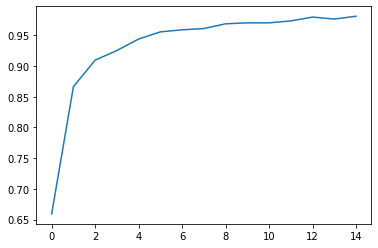

In [15]:
plt.plot(results.history['accuracy'])

In [16]:
train_image_gen.class_indices

{'Eyes Closed': 0, 'Eyes Opened': 1}

In [17]:
model.save('models/cnnCat2.h5', overwrite=True)

In [20]:
import numpy as np
from keras.preprocessing import image

file = 'lisat_gaze_data/val/Eyes Closed/Subject1_no_glasses_RGB_EyesClosed_gaze_6.jpg'

img = image.load_img(file,target_size=(24,24), color_mode='grayscale')

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255
img.shape

(1, 24, 24, 1)

In [21]:
prediction_class = model.predict_classes(img)
print(f'Image belongs to the class: {prediction_class} ')

Image belongs to the class: [[0]] 
